# ACTIVIDAD 1 - TECNICAS DE INTELIGENCIA ARTIFICIAL

### 1. En la primer sentencia de código se exportan todas las librerías que serán utilizadas posteriormente

In [1]:
import sys
!{sys.executable} -m pip install pycm
import pandas as pd
import numpy as np
from matplotlib import pyplot
import matplotlib.pyplot as plt
import matplotlib.image as pltimg
import pydotplus
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from pycm import ConfusionMatrix
from sklearn import tree
from sklearn import ensemble
from pandas.plotting import scatter_matrix

### 2. Se procede a exportar el dataset a utilizar con pandas

In [2]:
ruta_url = 'https://raw.githubusercontent.com/oscar-unir/TIA/main/datasets/car/Laboratorio_dataset_car.csv'

In [3]:
dataset = pd.read_csv(ruta_url, delimiter=';')

### 3. Empezamos a explorar el dataset para conocer los aspectos generales del conjunto de datos

In [4]:
print(dataset.shape)#Para saber el número de registros (instancias) y columnas (atributos)

(1750, 7)


In [5]:
print(dataset.head(10))#para visualizar que valores conforman los registros

  Buying Maintenance Doors Person lug_boot safety  class
0  vhigh       vhigh     2      2    small    low  unacc
1  vhigh       vhigh     2      2    small    med  unacc
2  vhigh       vhigh     2      2    small   high  unacc
3  vhigh       vhigh     2      2      med    low  unacc
4  vhigh       vhigh     2      2      med    med  unacc
5  vhigh       vhigh     2      2      med   high  unacc
6  vhigh       vhigh     2      2      big    low  unacc
7  vhigh       vhigh     2      2      big    low  unacc
8  vhigh       vhigh     2      2      big    med  unacc
9  vhigh       vhigh     2      2      big   high  unacc


In [6]:
print(dataset.groupby('class').size())#Para visualizar los valores de las clases y las instancias que las conforman

class
acc       390
good       75
unacc    1215
vgood      70
dtype: int64


In [7]:
print(dataset.groupby('Buying').size())

Buying
high     432
low      437
med      438
vhigh    443
dtype: int64


In [8]:
print(dataset.groupby('Maintenance').size())

Maintenance
high     432
low      447
med      434
vhigh    437
dtype: int64


In [9]:
print(dataset.groupby('Doors').size())

Doors
2        444
3        435
4        434
5more    437
dtype: int64


In [10]:
print(dataset.groupby('Person').size())

Person
2       578
4       587
more    585
dtype: int64


In [11]:
print(dataset.groupby('lug_boot').size())

lug_boot
big      585
med      583
small    582
dtype: int64


In [12]:
print(dataset.groupby('safety').size())

safety
high    590
low     578
med     582
dtype: int64


In [13]:
print(dataset.describe())

       Buying Maintenance Doors Person lug_boot safety  class
count    1750        1750  1750   1750     1750   1750   1750
unique      4           4     4      3        3      3      4
top     vhigh         low     2      4      big   high  unacc
freq      443         447   444    587      585    590   1215


### 4. Ahora procedemos a aplicar cálculos estadísticos sobre el conjunto de datos para conocer la distribución de los valores

Cómo los atributos de entrada del dataset son de tipo cualitativo, se hará un mapeo de sus valores a números para poder realizar cálculos estadísticos sobre los datos.

In [14]:
#Creamos el diccionario con el mapeo correspondiente
mapeo_var_categoricas = {'Buying': {'low': 1, 'med': 2, 'high': 3, 'vhigh': 4},
                         'Maintenance': {'low': 1, 'med': 2, 'high': 3, 'vhigh': 4},
                         'Doors': {'2': 1, '3': 2, '4': 3, '5more': 4},
                         'Person': {'2': 1, '4': 2, 'more': 3},
                         'lug_boot': {'small': 1, 'med': 2, 'big': 3},
                         'safety': {'low': 1, 'med': 2, 'high': 3}}

In [15]:
#mapeamos el dataset con la función replace() para dataframes
dataset = dataset.replace(mapeo_var_categoricas)

#Visualizamos como queda el datast final
dataset.head(5)

,Buying,Maintenance,Doors,Person,lug_boot,safety,class
0,4,4,1,1,1,1,unacc
1,4,4,1,1,1,2,unacc
2,4,4,1,1,1,3,unacc
3,4,4,1,1,2,1,unacc
4,4,4,1,1,2,2,unacc


Ahora que el dataset ya está mapeado con valores numéricos, podemos aplicar algunas funciones estadísticas de distribución sobre los datos

#### Histograma para visualizar la distribución de los valores de los atributos de entrada

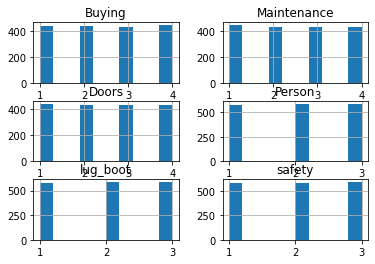

In [16]:
dataset.hist()
pyplot.show()

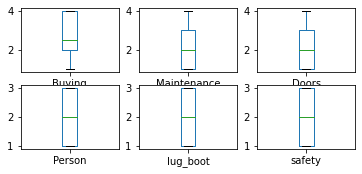

In [17]:
dataset.plot(kind='box',subplots=True, layout=(3,3), sharex=False, sharey=False)
pyplot.show()

### 5. Creación del Conjunto de Entrenamiento y validación

Primero se procede a dividir el dataset, se separan los atributos de entradas, de los atributos de salida

In [18]:
lista_datos = dataset.values
X = lista_datos[:,0:6]
y = lista_datos[:,6]

Por último, se particionan los datos en datos de entrenamiento y datos de validación, quedando las siguientes variables de salida

In [19]:
X_train, X_validation, Y_train, Y_validation = train_test_split(X, y, shuffle=True,test_size=0.20, random_state=10)

### 6. Elección de los modelos de clasificación

Para esta actividad se han seleccionado los algoritmos de clasificación ***CART*** y ***Random Forest***, ya que poseen características aptas para realizar tareas de clasificación.

In [20]:
#Se crea el diccionario modelos donde se guardarán los modelos a utilizar
#también se creará el diccionario resultados para guardar los resultados de los modelos y realizar una comparación conjunta
modelos = {}
resultados = {'nombre_modelo':[], 'resultado': []}

In [21]:
#Primero se crea el modelo de regresión logística
modelos['RF'] = RandomForestClassifier(n_estimators=10)

In [22]:
#Luego se crea el modelo de árbol de clasificación CART
modelos['CART']= DecisionTreeClassifier()

In [23]:
#Se obtiene las claves del diccionario modelos
modelos.keys()

dict_keys(['RF', 'CART'])

In [24]:
#Se itera por los modelos para obtener resultados iniciales de la precisión de las predicciones
#Para la comparación conjunta se utilizará la comparación cruzada
for nombre_modelo in modelos.keys():
    kfold = StratifiedKFold(n_splits=10, random_state=10, shuffle=True)
    resultado_val_cruzada = cross_val_score(modelos[nombre_modelo], X_train, Y_train, cv=kfold, scoring='accuracy')
    resultados['nombre_modelo'].append((nombre_modelo))
    resultados['resultado'].append((resultado_val_cruzada))
    print('%s: %f (%f)' % (nombre_modelo, resultado_val_cruzada.mean(), resultado_val_cruzada.std()))

RF: 0.960714 (0.006585)
CART: 0.988571 (0.006547)


Con los resultados ya obtenidos, procedemos a crear un gráfico de cajas donde podremos ver el puntaje de precisión obtenido por cada modelo en la etapa de comparación cruzada.

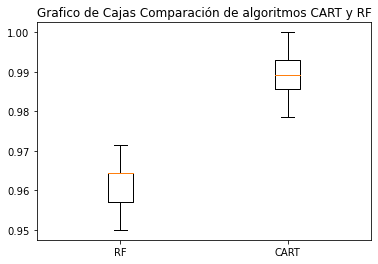

In [25]:
# Comparación de algoritmos 
pyplot.boxplot(resultados['resultado'], labels=resultados['nombre_modelo']) 
pyplot.title('Grafico de Cajas Comparación de algoritmos CART y RF')
pyplot.show()

### 7. Entrenamiento y Validación de los modelos elegidos

In [26]:
#Antes de trabajar con los modelos creamos una lista conteniendo el nombre de las clases, la cual servirá para crear visualizaciones
nombre_clases = ['acc', 'good', 'unacc', 'vgood']

#### Modelo Predictivo CART

Primero entrenamos el modelo con el conjunto de datos de entrenamiento

In [27]:
cart_clasificador = modelos['CART'].fit(X_train, Y_train) 

Luego lo validamos con el conjunto de datos de validación

In [28]:
cart_pred_score = modelos['CART'].predict(X_validation)

En base a la validación anterior revisamos el nivel de precisión de nuestro modelo

In [29]:
print(accuracy_score(Y_validation, cart_pred_score))

0.98


procedemos a generar y graficar la matriz de confusión para el modelo predictivo CART

Matriz de Confusión CART Sin Normalizar
[[ 86   0   0   0]
 [  2  17   0   0]
 [  4   1 226   0]
 [  0   0   0  14]]
Matriz de Confusión CART Normalizada
[[1.         0.         0.         0.        ]
 [0.10526316 0.89473684 0.         0.        ]
 [0.01731602 0.004329   0.97835498 0.        ]
 [0.         0.         0.         1.        ]]


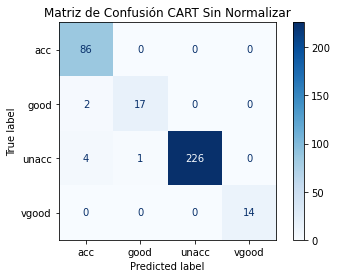

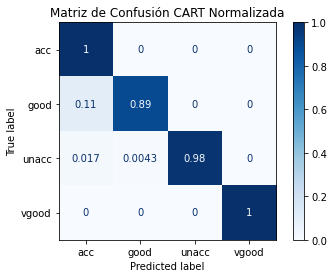

In [30]:
# Plot non-normalized confusion matrix - Tomado de la documentación oficial de scikitlearn
cart_titulos_cm = [("Matriz de Confusión CART Sin Normalizar", None),
                  ("Matriz de Confusión CART Normalizada", 'true')]
for titulo, normalizacion in cart_titulos_cm:
    cart_visualizacion_cm = plot_confusion_matrix(cart_clasificador, X_validation, Y_validation,
                                 display_labels=nombre_clases,
                                 cmap=plt.cm.Blues,
                                 normalize=normalizacion)
    cart_visualizacion_cm.ax_.set_title(titulo)

    print(titulo)
    print(cart_visualizacion_cm.confusion_matrix)

plt.show()


También utilizamos la librería pycm para obtener estadísticas más precisas de nuestro modelo predictivo como ser TPR y FPR

In [31]:
cart_estadisticas_cm = ConfusionMatrix(actual_vector=Y_validation,predict_vector=cart_pred_score)
print(cart_estadisticas_cm)

Predict     acc         good        unacc       vgood       
Actual
acc         86          0           0           0           

good        2           17          0           0           

unacc       4           1           226         0           

vgood       0           0           0           14          





Overall Statistics : 

95% CI                                                            (0.96533,0.99467)
ACC Macro                                                         0.99
ARI                                                               0.94403
AUNP                                                              0.98713
AUNU                                                              0.98092
Bangdiwala B                                                      0.97199
Bennett S                                                         0.97333
CBA                                                               0.95197
CSI                                                       

Por último, creamos una gráfica del árbol generado

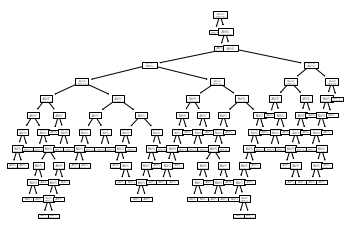

In [32]:
tree.plot_tree(cart_clasificador)
plt.show()

También se puede generar el mismo árbol con la librería graphviz

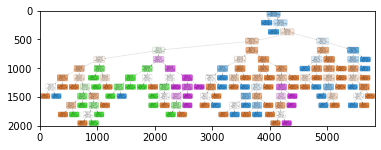

In [33]:
cart_data = tree.export_graphviz(modelos['CART'], out_file=None, feature_names=dataset.columns.values[0:6], 
                            class_names=nombre_clases, filled=True, rounded=True, special_characters=True)
cart_grafico_arbol = pydotplus.graph_from_dot_data(cart_data)
cart_grafico_arbol.write_png('cart_arbol_decision.png')
cart_imagen_arbol = pltimg.imread('cart_arbol_decision.png')
imgplot = plt.imshow(cart_imagen_arbol)
plt.show()

#### Modelo Predictivo Random Forest

Primero entrenamos el modelo con el conjunto de datos de entrenamiento

In [34]:
rf_clasificador = modelos['RF'].fit(X_train, Y_train) 

Luego lo validamos con el conjunto de datos de validación

In [35]:
rf_pred_score = modelos['RF'].predict(X_validation)

En base a la validación anterior revisamos el nivel de precisión de nuestro modelo

In [36]:
print(accuracy_score(Y_validation, rf_pred_score))

0.9542857142857143


procedemos a generar y graficar la matriz de confusión para el modelo predictivo de Regresión Logística Lineal

Matriz de Confusión RF Sin Normalizar
[[ 83   1   2   0]
 [  3  15   0   1]
 [  6   2 223   0]
 [  1   0   0  13]]
Matriz de Confusión RF Normalizada
[[0.96511628 0.01162791 0.02325581 0.        ]
 [0.15789474 0.78947368 0.         0.05263158]
 [0.02597403 0.00865801 0.96536797 0.        ]
 [0.07142857 0.         0.         0.92857143]]


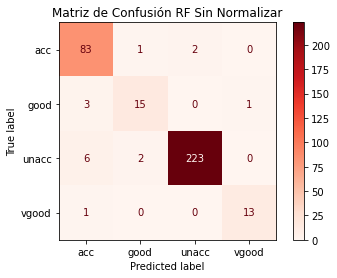

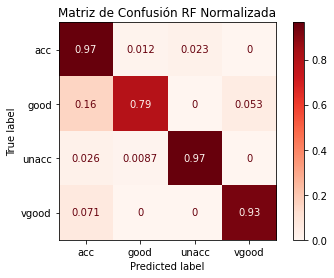

In [37]:
# Plot non-normalized confusion matrix - Tomado de la documentación oficial de scikitlearn
rf_titulos_cm = [("Matriz de Confusión RF Sin Normalizar", None),
                  ("Matriz de Confusión RF Normalizada", 'true')]
for titulo, normalizacion in rf_titulos_cm:
    rf_visualizacion_cm = plot_confusion_matrix(rf_clasificador, X_validation, Y_validation,
                                 display_labels=nombre_clases,
                                 cmap=plt.cm.Reds,
                                 normalize=normalizacion)
    rf_visualizacion_cm.ax_.set_title(titulo)

    print(titulo)
    print(rf_visualizacion_cm.confusion_matrix)

plt.show()

También utilizamos la librería pycm para obtener estadísticas más precisas de nuestro modelo predictivo como ser TPR y FPR

In [38]:
rf_estadisticas_cm = ConfusionMatrix(actual_vector=Y_validation,predict_vector=rf_pred_score)
print(rf_estadisticas_cm)

Predict     acc         good        unacc       vgood       
Actual
acc         83          1           2           0           

good        3           15          0           1           

unacc       6           2           223         0           

vgood       1           0           0           13          





Overall Statistics : 

95% CI                                                            (0.9324,0.97617)
ACC Macro                                                         0.97714
ARI                                                               0.88584
AUNP                                                              0.96664
AUNU                                                              0.94773
Bangdiwala B                                                      0.94218
Bennett S                                                         0.93905
CBA                                                               0.89397
CSI                                                     

Por último, creamos una gráfica del modelo generado

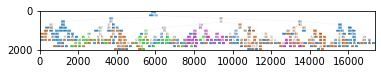

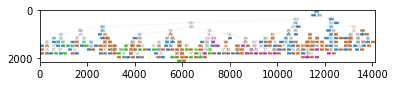

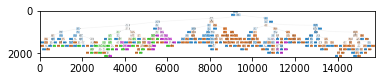

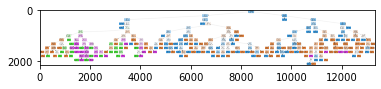

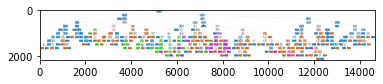

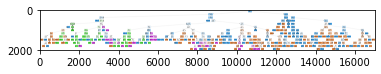

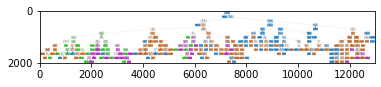

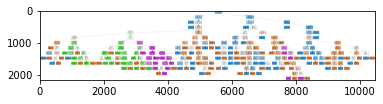

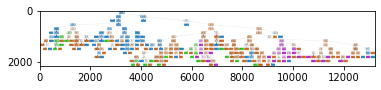

In [39]:
for index in range (0, 9):
    cart_data = tree.export_graphviz(modelos['RF'].estimators_[index], out_file=None, feature_names=dataset.columns.values[0:6], 
                            class_names=nombre_clases, filled=True, rounded=True, special_characters=True)
    cart_grafico_arbol = pydotplus.graph_from_dot_data(cart_data)
    cart_grafico_arbol.write_png('cart_arbol_decision.png')
    cart_imagen_arbol = pltimg.imread('cart_arbol_decision.png')
    imgplot = plt.imshow(cart_imagen_arbol)
    plt.show()